In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### VERİ SETİNİN YÜKLENMESİ

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [4]:
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [5]:
print(fruits.shape)

(59, 7)


In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


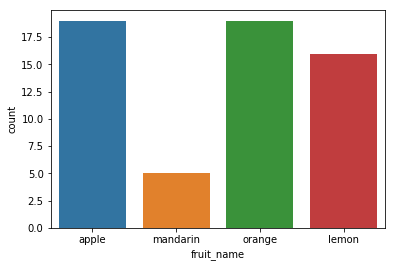

In [7]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

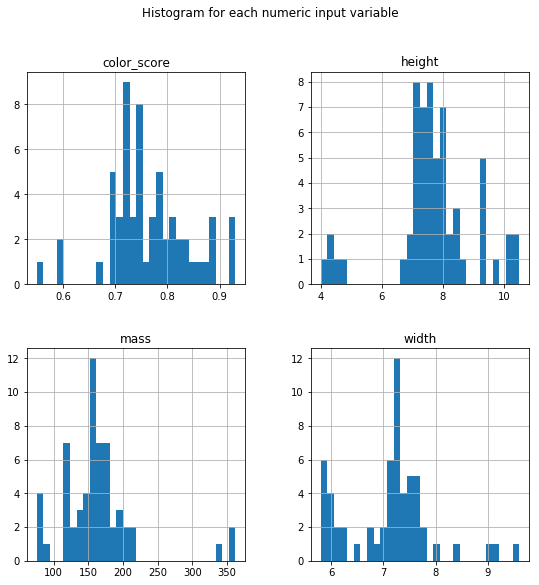

In [8]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

### Modeli tahmin ederken kullanılacak öznitelikler

In [9]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

### Modelin Eğitilmesi

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

#### Accuracy

In [12]:
from sklearn import metrics
print("Random Forest Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy Score: 0.8888888888888888


#### Confusion Matrix

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[5 0 2 0]
 [0 1 0 0]
 [0 0 5 0]
 [0 0 0 5]]


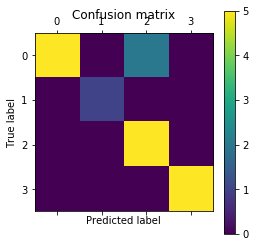

In [14]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K-fold cross validation

In [15]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y, cv=10))

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[1.         1.         0.85714286 1.         0.85714286 1.
 1.         1.         1.         1.        ]


#### Prediction

In [16]:
clf.predict([[86,6.2,4.7,0.80]])

array([3], dtype=int64)

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size =0.3, random_state = 0, stratify = y)

In [19]:
clf.fit(X_train,y_train)
test_sonuc = clf.predict(X_test)
print(test_sonuc)

[2 3 3 3 4 3 3 4 1 1 1 1 1 1 1 4 4 4]


#### Accuracy

In [20]:
from sklearn.metrics import accuracy_score
print('Decision Tree Accuracy Score: ' + str(accuracy_score(test_sonuc, y_test)))

Decision Tree Accuracy Score: 0.7777777777777778


#### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_sonuc)
print(cm)

[[5 0 0 1]
 [0 1 0 0]
 [0 0 5 1]
 [2 0 0 3]]


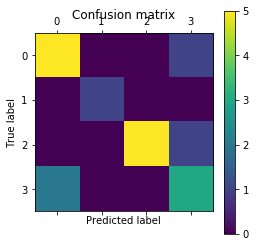

In [22]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K-fold cross validation

In [23]:
print(cross_val_score(clf, X, y, cv=10))

[0.85714286 1.         0.85714286 1.         0.85714286 0.83333333
 0.8        1.         0.8        0.66666667]


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


#### Prediction

In [24]:
clf.predict([[86,6.2,4.7,0.80]])

array([2], dtype=int64)

### K-Nearest Neighbors

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [27]:
from sklearn.neighbors import KNeighborsClassifier  
kNN = KNeighborsClassifier(n_neighbors=5)  
kNN.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
y_pred = kNN.predict(X_test)  

#### Accuracy

In [29]:
print('K-NN Accuracy Score: ' + str(metrics.accuracy_score(y_test, y_pred)))

K-NN Accuracy Score: 0.9444444444444444


#### Confusion Matrix

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(y_test, y_pred)
cm

array([[5, 0, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 4]], dtype=int64)

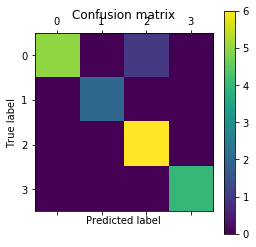

In [31]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K-fold cross validation

In [32]:
print(cross_val_score(kNN, X, y, cv=10))

[0.57142857 0.71428571 0.71428571 0.57142857 0.57142857 0.5
 0.8        0.6        0.         0.66666667]


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


#### Prediction

In [33]:
kNN.predict([[86,6.2,4.7,0.80]])

array([3], dtype=int64)